# 2008 Crisis

Let's investigate how the 2008 crisis economic crisis is related to crime activity in Chicago.

## Environment Setup

In [1]:
import pandas as pd
import numpy as np

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
# import seaborn; seaborn.set(style='whitegrid', rc={'axes.grid' : False})
import seaborn as sns; sns.set(style='whitegrid')

In [3]:
# load crime data
crimes_df = pd.read_pickle('data/processed_data.pkl')
crimes_df.sort_index(inplace=True)

## Unemployment

One indicator that shows one of the harshest impacts of the 2008 crisis is **Unemployment Rate**.

Also, studies and reports ([UNODC](https://www.unodc.org/documents/data-and-analysis/statistics/crime/GIVAS_Final_Report.pdf), [Crime Survey for England and Wales](https://www.theguardian.com/uk/2009/apr/23/british-crime-survey-figures-robbery), [Criminality During the Financial Crisis in Greece](https://www.sciencedirect.com/science/article/abs/pii/S0924933815310610)) have shown that some types of crime are more likely to increase during periods of economic downturn. These include:

- Robbery
- Burglary
- Theft

Let's relate these types of crimes to the unemployment rate in Chicago over time.

In [66]:
unemp_df = pd.read_csv('data/external/Unemployment-Cook County-Time Series.csv', index_col='Date', parse_dates=True)
unemp_df.sort_index(inplace=True)
unemp_df.head()

,Unemployment
Date,
1990-01-01,6.6
1990-02-01,6.5
1990-03-01,6.3
1990-04-01,6.3
1990-05-01,6.1


Since we will only analyze crime data up until 2016, let's select the time range.

In [67]:
unemp_df = unemp_df['2001':'2016']

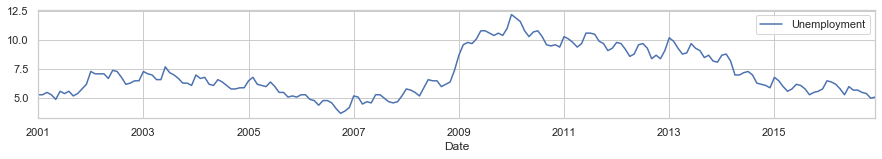

In [68]:
unemp_df.plot(figsize=(15,2));

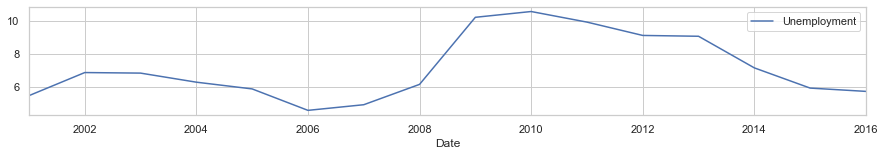

In [69]:
unemp_df.resample('Y').mean().plot(figsize=(15,2));

## Select crime types

As previously discussed, let's focus our analysis on these crimes types:

- Robbery
- Burglary
- Theft

In [52]:
robbery_IUCR = [
    '0312','0313','031A','031B','0320','0325','0326',
    '0330','0331','0334','0337','033A','033B','0340'
]
burglary_IUCR = [
    '0610','0620','0630','0650'
]
theft_IUCR = [
    '0810','0820','0840','0841','0842','0843','0850',
    '0860','0865','0870','0880','0890','0895'
]

crisis_IUCR = robbery_IUCR + burglary_IUCR + theft_IUCR

In [53]:
crisis_crimes = crimes_df[crimes_df['IUCR'].isin(crisis_IUCR)]

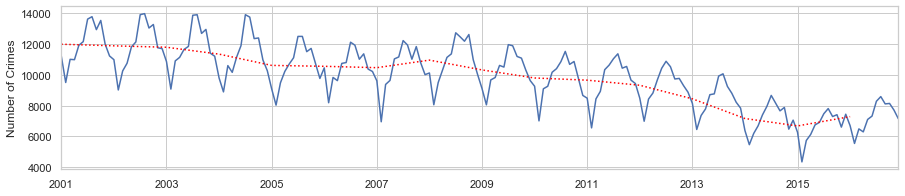

In [54]:
crisis_crimes.resample('M').size().plot(figsize=(15,3));
crisis_crimes.resample('M').size().resample('Y').mean().plot(style=':', color='red', figsize=(15,3));
plt.ylabel('Number of Crimes');
# the red line is the average number of crimes per month in each year

## Connect both variables

In [70]:
year_unemp = unemp_df.resample('Y').mean()
year_crimes = crisis_crimes.resample('Y').size()
year_crimes.name = 'Number of Crimes'

unemp_crimes = year_unemp.join(year_crimes)
unemp_crimes.index = unemp_crimes.index.year
unemp_crimes.index.name = 'Year'
unemp_crimes

,Unemployment,Number of Crimes
Year,,
2001,5.458333,143717
2002,6.858333,142472
2003,6.825000,141363
2004,6.275000,136005
2005,5.866667,127235
2006,4.566667,126526
2007,4.908333,125463
2008,6.141667,131347
2009,10.208333,123714


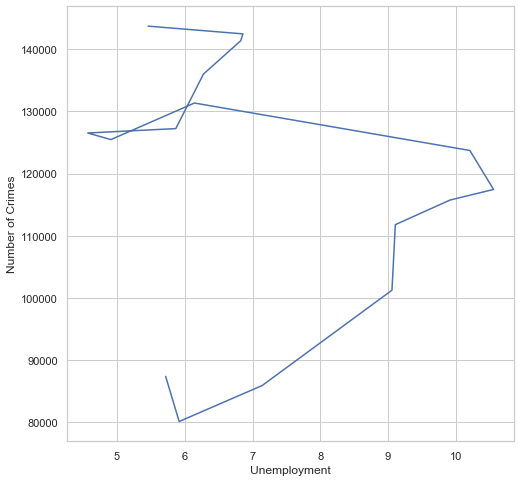

In [71]:
plt.figure(figsize=(8,8))
plt.plot(unemp_crimes['Unemployment'],
         unemp_crimes['Number of Crimes']);
plt.xlabel('Unemployment');
plt.ylabel('Number of Crimes');

## Export data

In [72]:
unemp_crimes.to_csv('data/Unemployment_and_Crimes_2001_2016.csv')